In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
n      = 10 # number of arms
probs  = np.random.rand(n) # randomly generated probabilites for each arm
record = np.zeros((n,2))  #first column: counts, second column: rewards

In [9]:
# select arm hightest average rewards with UCB c = 1 

def get_best_arm(record, t, c=1):

    ucb_values = np.zeros(n)
    
    for arm in range(n):
        if record[arm, 0] == 0:
            ucb_values[arm] = 1e400  # Assign a very high value if the arm hasn't been played
        else:
            average_reward = record[arm, 1] / record[arm, 0]
            ucb_values[arm] = average_reward + c * np.sqrt(2 * np.log(t) / record[arm, 0])
    return np.argmax(ucb_values)

In [10]:
# Updates the record for an arm with new reward

def update_record(record, action, r):
    record[action, 0] += 1  # Update the count for this arm
    record[action, 1] += r  # Update the sum of rewards for this arm
    return record

In [11]:
 # Simulates the reward for an arm based on its probability

def get_reward(prob, n=10):
    reward = 0
    for _ in range(n):
        if random.random() <= prob:
            reward += 1
    return reward

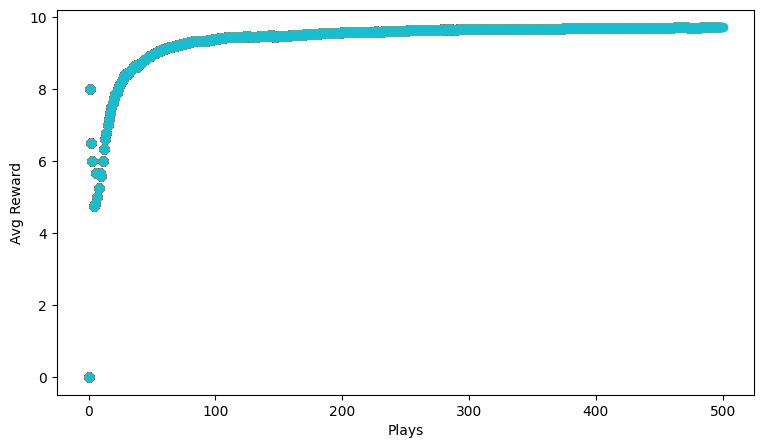

In [12]:
# Plotting setup
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9, 5)
rewards = [0]

for i in range(1, 501):

    choice = get_best_arm(record, i) # epsilon-greedy policy: most of the time choose the best arm
    r      = get_reward(probs[choice]) # get the reward for chosen arm
    record = update_record(record, choice, r) # udpate the record with new record

    mean_reward = np.sum(record[:, 1]) / i # calculat the mean reward
    rewards.append(mean_reward)

    ax.scatter(np.arange(len(rewards)), rewards)

plt.show()